<a href="https://colab.research.google.com/github/sraeisi/QuantumOptics/blob/master/Quantum_Optics_Wigner_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qutip
# !pip install ipywidgets

     |████████████████████████████████| 3.3MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for qutip: filename=qutip-4.5.3-cp36-cp36m-linux_x86_64.whl size=12469350 sha256=0bb8968bef691fe78234066281728ab8ae28e5e79535fd1f128c7ed2694eb3bc
  Stored in directory: /root/.cache/pip/wheels/3a/c7/5a/78f98f4e9c897dead831832cb7ec31965937253aedeba86622
Successfully built qutip


In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from qutip import *
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, fixed, IntSlider


Nh= 20 #Size of Hilbert Space 

def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

In [70]:
def plot_numberbasis(psi):
    fig = plt.figure(figsize=(14, 6))
    
    ax = fig.add_subplot(1, 1, 1)
    plot_fock_distribution(psi, fig=fig, ax=ax);   
    plt.ylim(0,1.1)
    plt.xticks(np.arange(0,Nh,1))
    plt.close(fig)
    return fig

# Fock State

## Nubmber basis

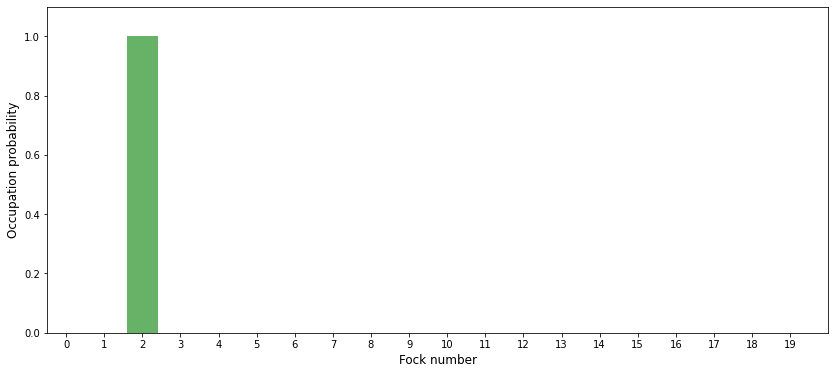

In [18]:
n=2
psi = basis(Nh, 2).unit()
plot_numberbasis(psi)

In [22]:
# @interact
def fock_state(n):
  psi = basis(N, n)
  return plot_numberbasis(psi)

interact(fock_state, n=IntSlider(min=0, max=N, step=1, value=2))

interactive(children=(IntSlider(value=2, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.fock_state>

## Quadratures

In [63]:
#@title Hermite functions

# https://dpotoyan.github.io/Chem324/HarmOsc_visualize.html
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
from math import factorial
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

#Check to see if they match the table
H=hermite(4)
print(H)

def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)
    
    return Psix

# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=psi(5,x)**2

Integral = trapz(psi2,x)

print(Integral)

def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2

# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)    

    4      2
16 x - 48 x - 8.882e-16 x + 12
1.0000000000000009


In [65]:
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y= psi(v,x)**2
    
    plt.plot(x,y,lw=2)
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel(f'$\psi_{v}(x)$',fontsize=16)


interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

Text(0, 0.5, '$\\psi^2_n(x)$')

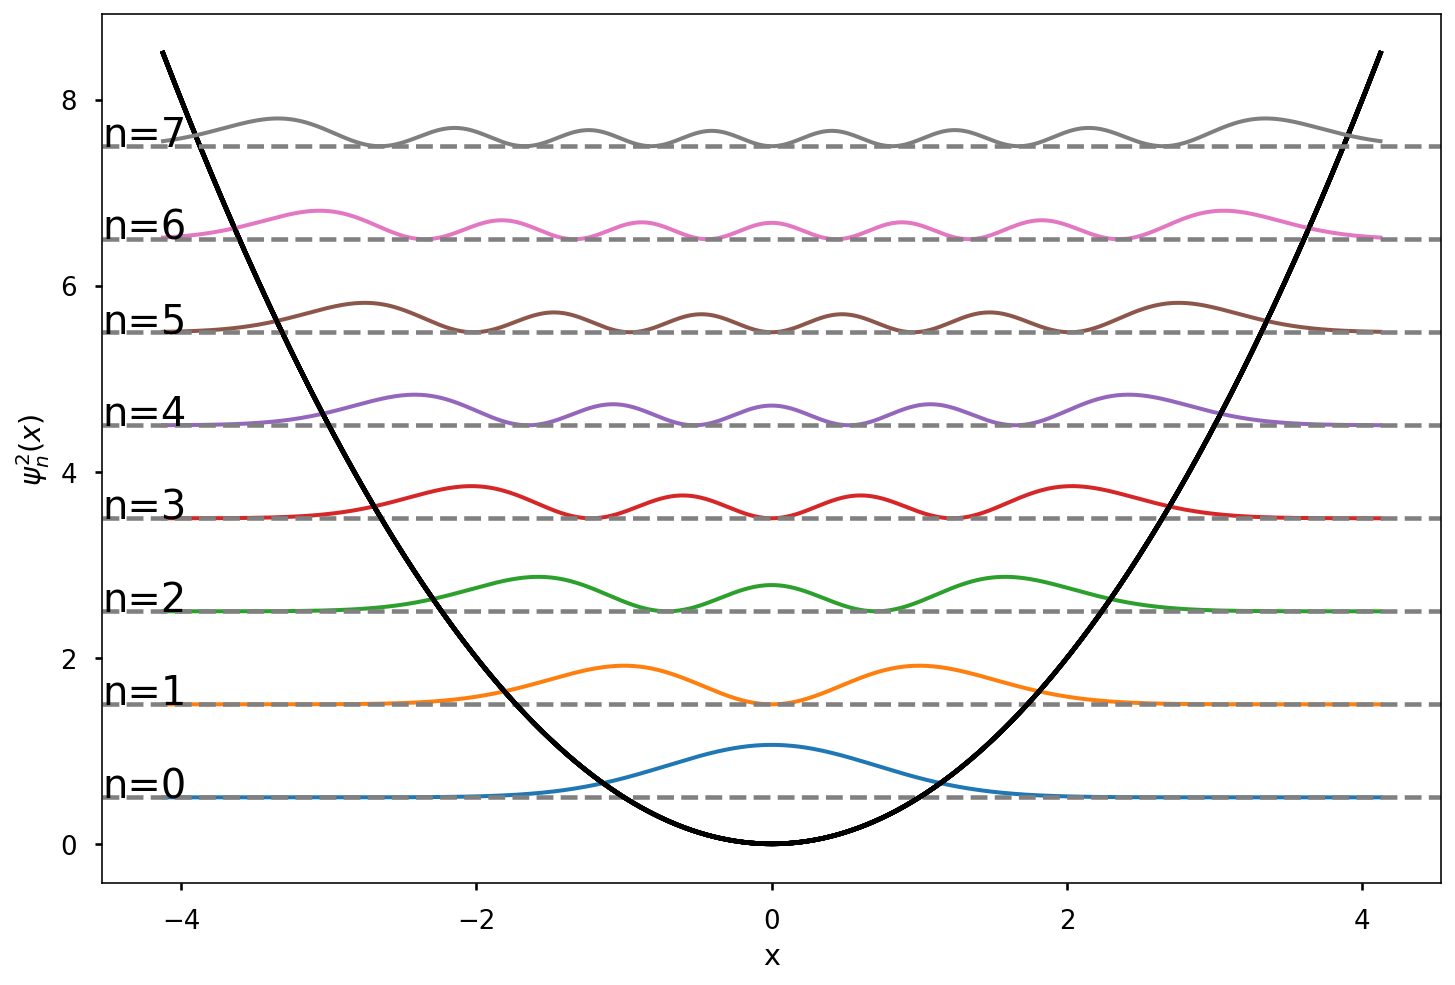

In [66]:
fig, ax = plt.subplots(figsize=(12,8))

for v in range(8):
     
    # plot potential V(x)
    ax.plot(x,V(x),color='black')
    
    # plot psi squared which we shift up by values of energy
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(-1.1*xmax, 1.*E(v), f"n={v}", fontsize=20)

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')


## Phase space

In [ ]:
psi = basis(N, 0)
plot_wigner_2d_3d(psi)

In [ ]:
# @interact
def wig_fock_state(n):
  psi = basis(N, n)
  return plot_wigner_2d_3d(psi)

interact(wig_fock_state, n=IntSlider(min=0, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='n', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.wig_fock_state>

# Thermal state

## Nubmber basis

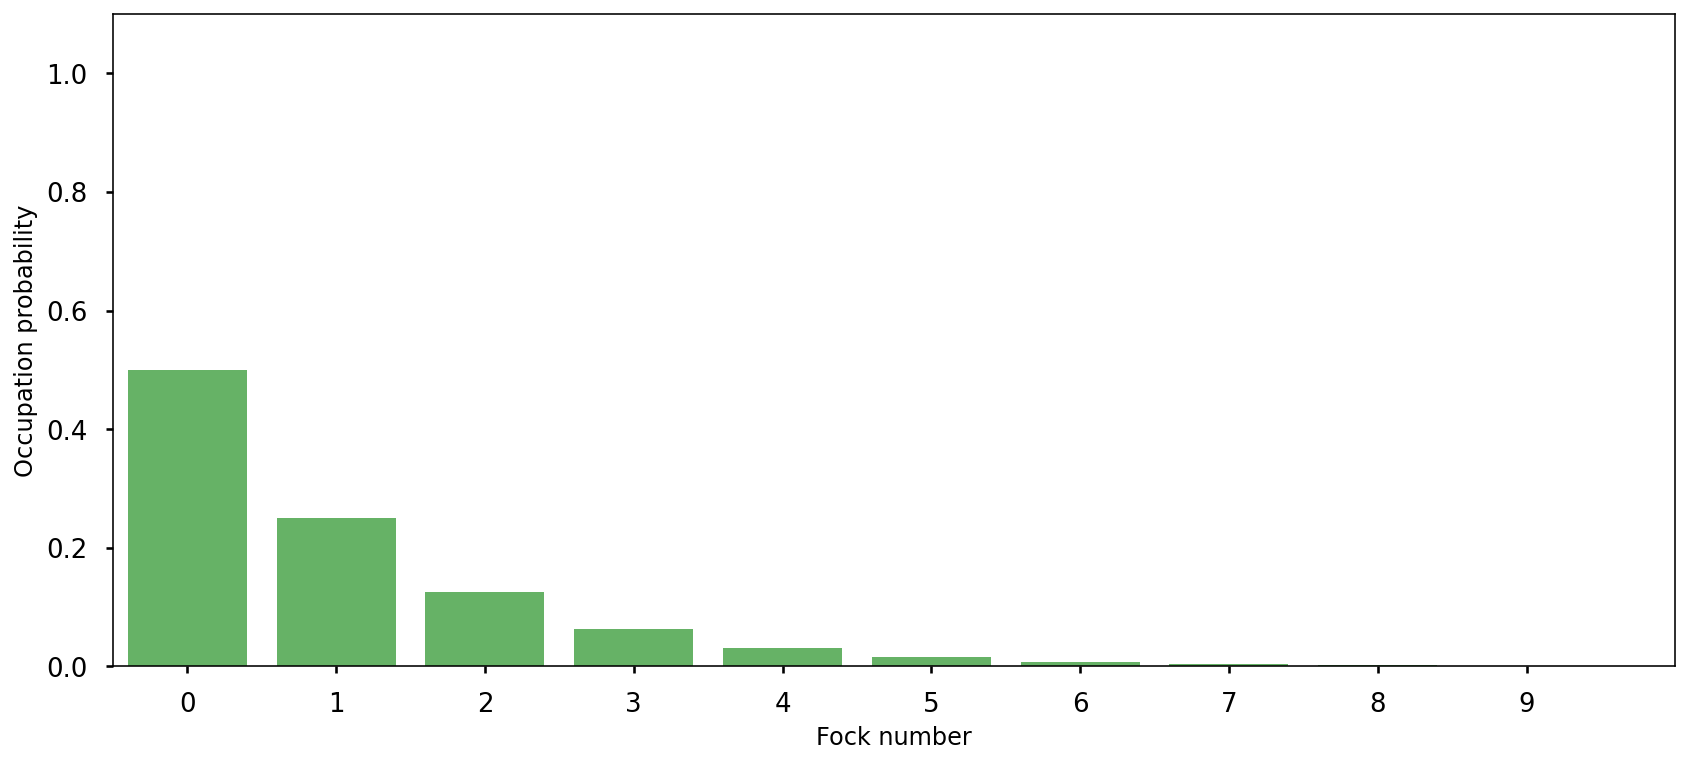

In [74]:
n=1
Nh=10
psi = thermal_dm(Nh, n)
plot_numberbasis(psi)

In [85]:
# @interact
def thermal_state(n):
  psi = thermal_dm(Nh, n)
  return plot_numberbasis(psi)

interact(thermal_state, n=IntSlider(min=0, max=Nh, step=1, value=2))

interactive(children=(IntSlider(value=2, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.thermal_state>

## Phase Space

In [76]:
# @interact
def wig_thermal_state(n):
  psi = thermal_dm(Nh, n)
  return plot_wigner_2d_3d(psi)

interact(wig_thermal_state, n=IntSlider(min=0, max=10, step=1, value=2))


interactive(children=(IntSlider(value=2, description='n', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.wig_thermal_state>

# Coherent State

## Nubmber basis

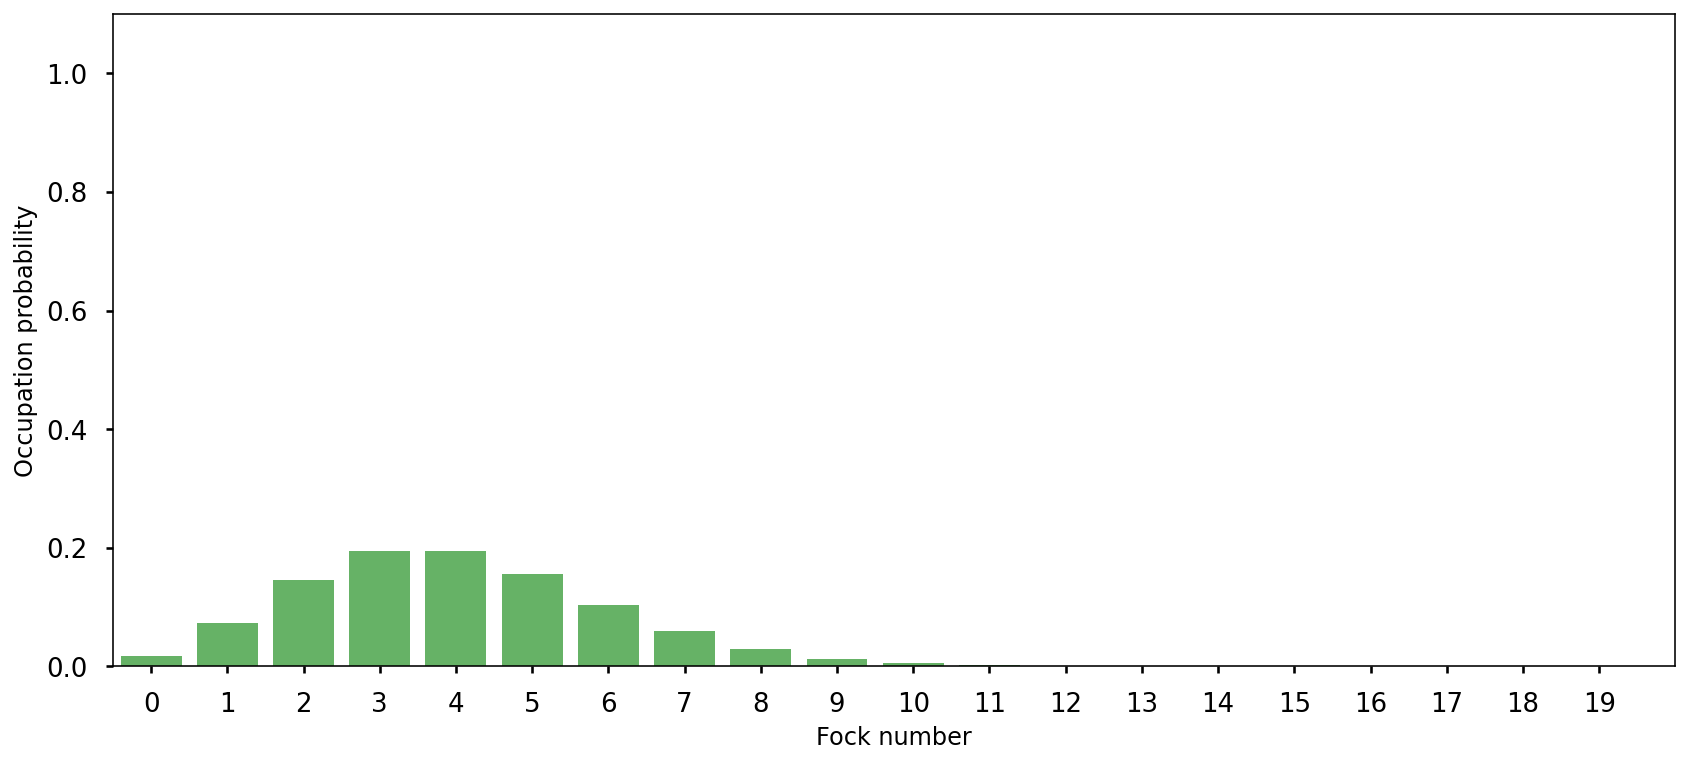

In [81]:
n=2
Nh=20
psi = coherent(Nh, n)
plot_numberbasis(psi)

In [84]:
# @interact
def coherent_state(n):
  psi = coherent(Nh, n)
  return plot_numberbasis(psi)

interact(coherent_state, n=IntSlider(min=0, max=np.sqrt(Nh), step=1, value=2))

interactive(children=(IntSlider(value=2, description='n', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.coherent_state>

##Phase Space

In [ ]:
# @interact
def wig_coherent_state(a):
  psi = coherent(Nh, a)
  return plot_wigner_2d_3d(psi)

interact(wig_coherent_state, a=IntSlider(min=0, max=5, step=1, value=2))


interactive(children=(IntSlider(value=2, description='a', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.wig_coherent_state>

# Squeezed state

## Nubmber basis

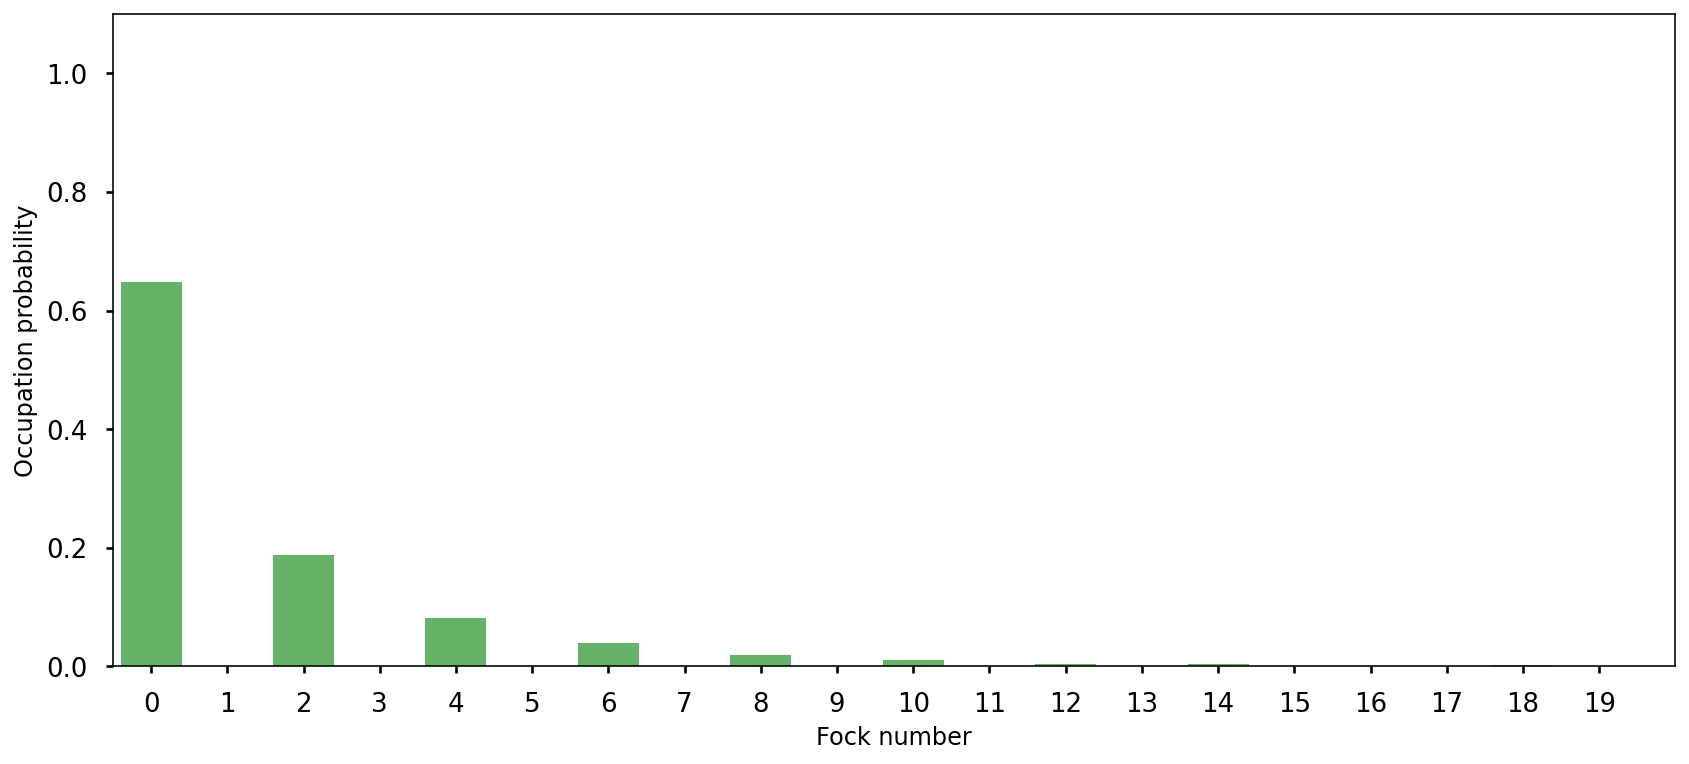

In [92]:
n=0
Nh=20
r=1
psi = squeeze( Nh, r)* basis(Nh, n)
plot_numberbasis(psi)

In [94]:
# @interact
def squeeze_state(r):
  psi = squeeze( Nh, .2*r)* basis(Nh, n)
  return plot_numberbasis(psi)

interact(squeeze_state, r=IntSlider(min=0, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='r', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.squeeze_state>

##Phase space

In [ ]:
N=30
def wig_squeezed_state(r):
  psi = squeeze( N, .25*r)* basis(N, 0)
  return plot_wigner_2d_3d(psi)

interact(wig_squeezed_state, r=IntSlider(min=0, max=4, step=1, value=2))


interactive(children=(IntSlider(value=2, description='r', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.wig_squeezed_state>

# Cat state

## Nubmber basis

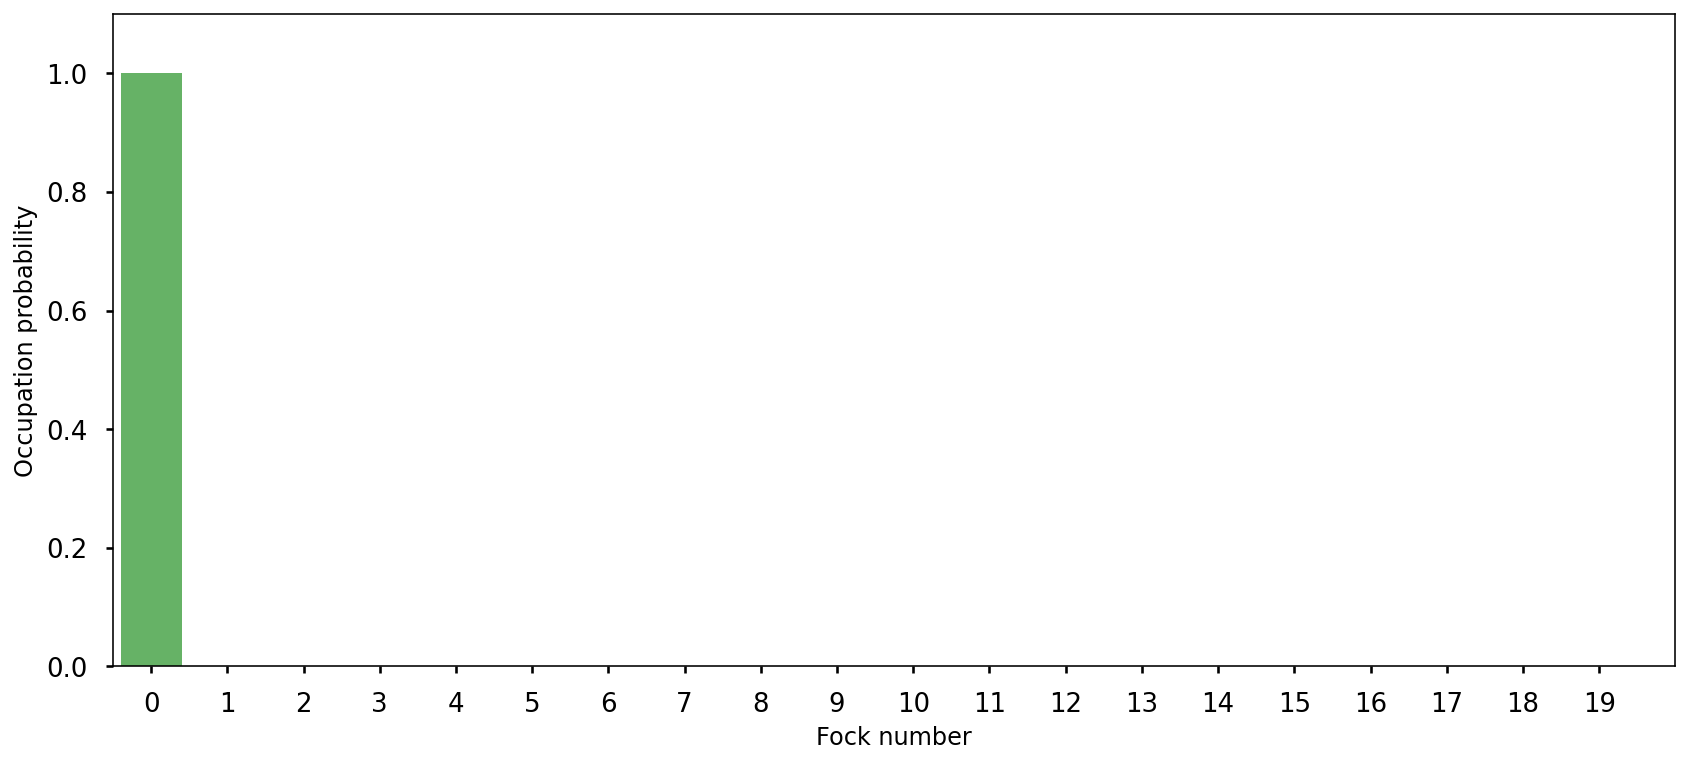

In [99]:
a=0
Nh=20
psi =  (coherent(Nh, -.5*a) + coherent(Nh, .5*a)) / 2
plot_numberbasis(psi)

In [100]:
# @interact
def cat_state(a):
  psi =  (coherent(Nh, -.2*a) + coherent(Nh, .2*a)) / 2
  return plot_numberbasis(psi)

interact(cat_state, a=IntSlider(min=0, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='a', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.cat_state>

##Phase Space

In [ ]:
N=30
def wig_cat_state(a):
  psi = (coherent(N, -.5*a) + coherent(N, .5*a)) / np.sqrt(2)
  return plot_wigner_2d_3d(psi)

interact(wig_cat_state, a=IntSlider(min=0, max=15, step=1, value=2))


interactive(children=(IntSlider(value=2, description='a', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.wig_cat_state>